# Student Success Prediction Project
## Introduction to AI - Final Project

This project aims to predict student success using machine learning models. We will compare classical machine learning methods (Logistic Regression and Decision Tree) with Neural Networks.

### Project Structure:
1. Data Analysis, Description and Understanding, Data Visualization
2. Data Preparation and Cleaning
3. Selection of Suitable Input Data and Possible Modification (Standardization, PCA)
4. Creating a Model Using Classical Methods (Logistic Regression / Decision Tree)
5. Creating a Model Using Neural Networks
6. Comparison of Both Models
7. Inference


## 1. Importing Required Libraries


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


## 2. Data Analysis, Description and Understanding


In [7]:
# Load the dataset
df = pd.read_csv('student_success.csv')

# Display basic information about the dataset
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nDataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1}")  # Excluding target variable
print(f"Target variable: 'class' (Binary: 0 = Failure, 1 = Success)")

print("\n" + "=" * 60)
print("FIRST FEW ROWS")
print("=" * 60)
print(df.head(10))


DATASET OVERVIEW

Dataset shape: (21, 3)
Number of samples: 21
Number of features: 2
Target variable: 'class' (Binary: 0 = Failure, 1 = Success)

FIRST FEW ROWS
   feature1  feature2  class
0     0.400     0.800      1
1     0.600     0.550      1
2     0.270     0.200      0
3     0.720     0.600      1
4     0.910     0.400      1
5     0.680     0.181      0
6     0.970     0.600      1
7     0.970     0.300      1
8     0.101     0.540      0
9     0.170     0.600      0


In [8]:
# Display dataset information
print("\n" + "=" * 60)
print("DATASET INFO")
print("=" * 60)
print(df.info())



DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  21 non-null     float64
 1   feature2  21 non-null     float64
 2   class     21 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 632.0 bytes
None


In [9]:
# Statistical summary
print("\n" + "=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
print(df.describe())



STATISTICAL SUMMARY
        feature1   feature2      class
count  21.000000  21.000000  21.000000
mean    0.496190   0.414381   0.380952
std     0.290393   0.216366   0.497613
min     0.090000   0.090000   0.000000
25%     0.252000   0.249000   0.000000
50%     0.500000   0.400000   0.000000
75%     0.702000   0.600000   1.000000
max     0.970000   0.800000   1.000000


In [10]:
# Check for missing values
print("\n" + "=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")



MISSING VALUES CHECK
feature1    0
feature2    0
class       0
dtype: int64

Total missing values: 0


In [11]:
# Check class distribution
print("\n" + "=" * 60)
print("CLASS DISTRIBUTION")
print("=" * 60)
class_dist = df['class'].value_counts()
print(class_dist)
print(f"\nClass 0 (Failure): {class_dist[0]} ({class_dist[0]/len(df)*100:.1f}%)")
print(f"Class 1 (Success): {class_dist[1]} ({class_dist[1]/len(df)*100:.1f}%)")



CLASS DISTRIBUTION
class
0    13
1     8
Name: count, dtype: int64

Class 0 (Failure): 13 (61.9%)
Class 1 (Success): 8 (38.1%)


## 3. Data Visualization


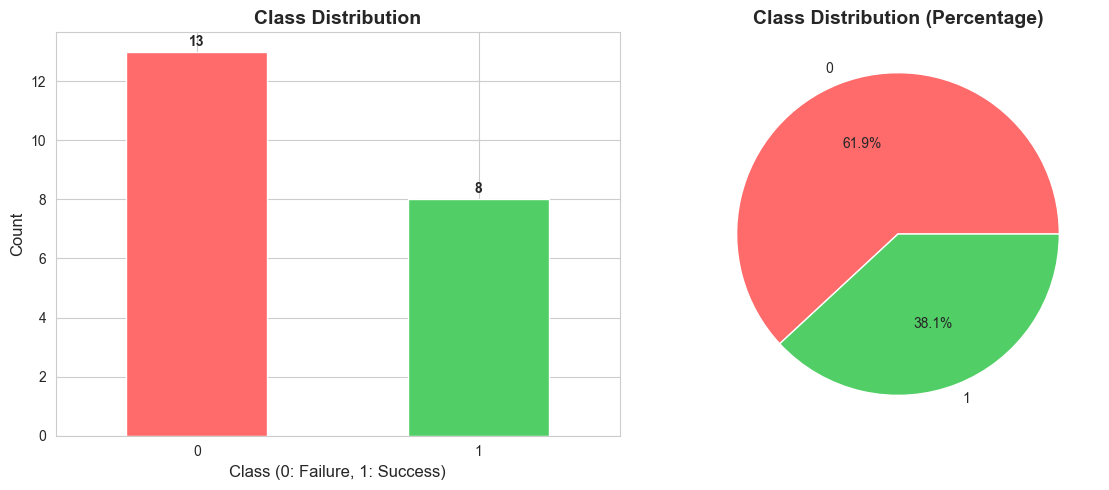

In [12]:
# Class distribution visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['class'].value_counts().plot(kind='bar', color=['#ff6b6b', '#51cf66'])
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class (0: Failure, 1: Success)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
for i, v in enumerate(df['class'].value_counts()):
    plt.text(i, v + 0.2, str(v), ha='center', fontweight='bold')

plt.subplot(1, 2, 2)
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff6b6b', '#51cf66'])
plt.title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()


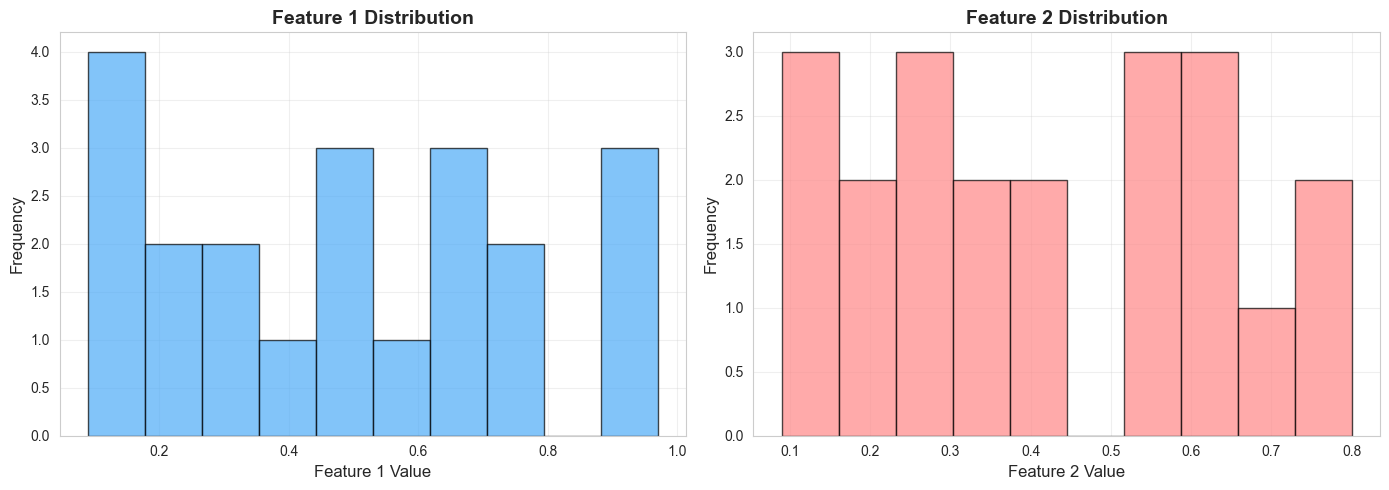

In [13]:
# Feature distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['feature1'], bins=10, color='#4dabf7', edgecolor='black', alpha=0.7)
axes[0].set_title('Feature 1 Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1 Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(True, alpha=0.3)

axes[1].hist(df['feature2'], bins=10, color='#ff8787', edgecolor='black', alpha=0.7)
axes[1].set_title('Feature 2 Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 2 Value', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


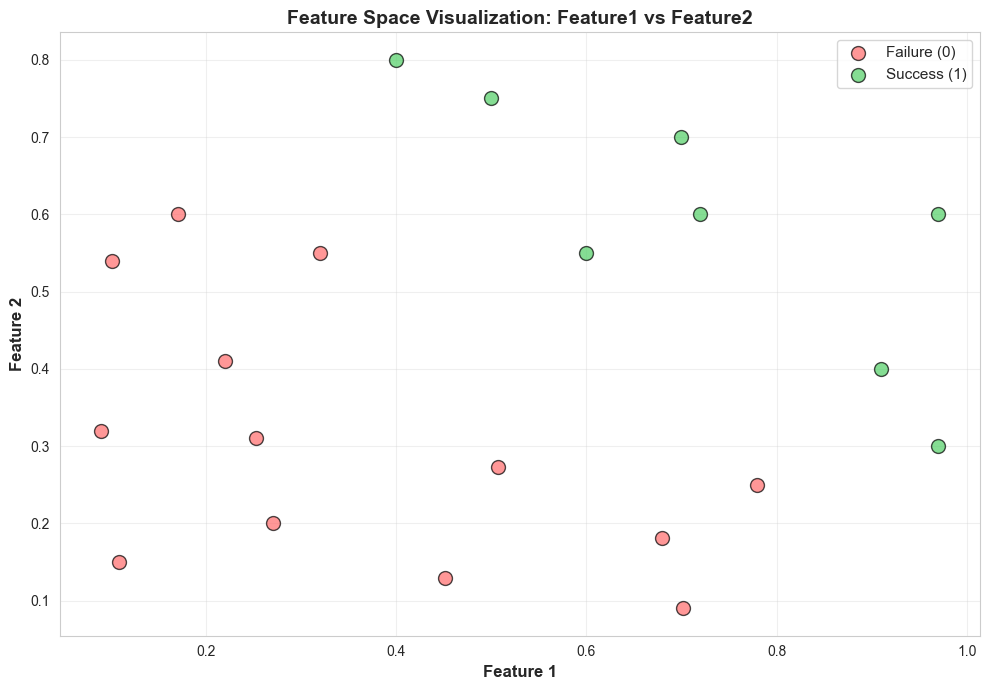

In [14]:
# Scatter plot: Feature1 vs Feature2 colored by class
plt.figure(figsize=(10, 7))

success = df[df['class'] == 1]
failure = df[df['class'] == 0]

plt.scatter(failure['feature1'], failure['feature2'], 
            c='#ff6b6b', label='Failure (0)', s=100, alpha=0.7, edgecolors='black')
plt.scatter(success['feature1'], success['feature2'], 
            c='#51cf66', label='Success (1)', s=100, alpha=0.7, edgecolors='black')

plt.xlabel('Feature 1', fontsize=12, fontweight='bold')
plt.ylabel('Feature 2', fontsize=12, fontweight='bold')
plt.title('Feature Space Visualization: Feature1 vs Feature2', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


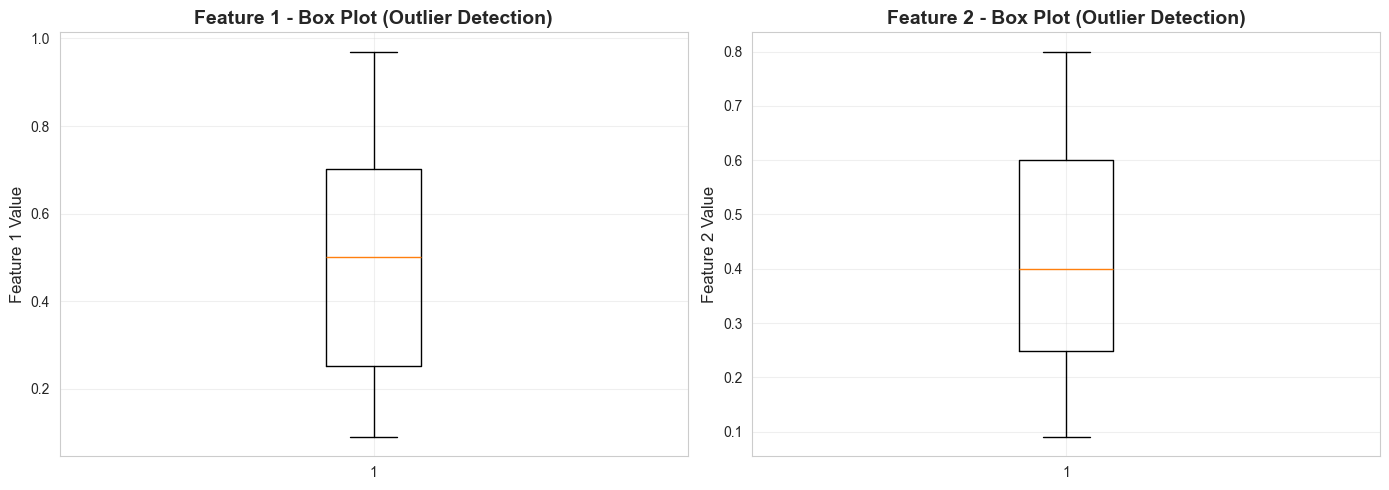

In [15]:
# Box plots to check for outliers
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot(df['feature1'], vert=True)
axes[0].set_title('Feature 1 - Box Plot (Outlier Detection)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Feature 1 Value', fontsize=12)
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df['feature2'], vert=True)
axes[1].set_title('Feature 2 - Box Plot (Outlier Detection)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Feature 2 Value', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


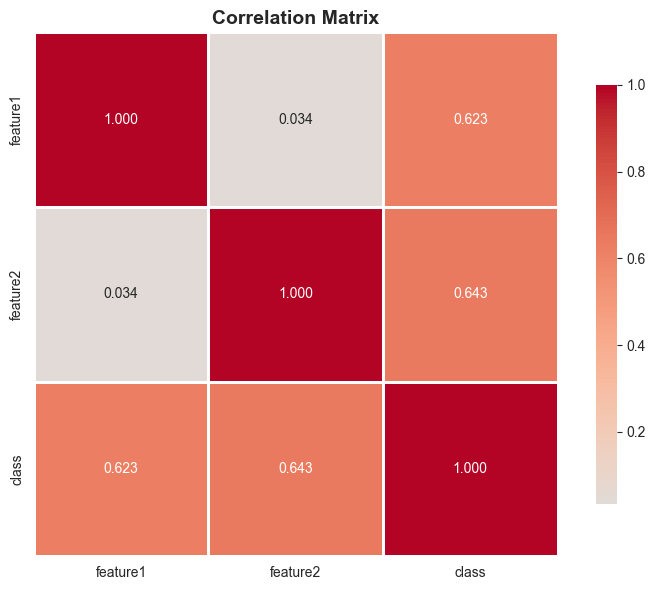

In [16]:
# Correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## 4. Data Preparation and Cleaning


In [17]:
# Create a copy for cleaning
df_clean = df.copy()

print("=" * 60)
print("DATA CLEANING PROCESS")
print("=" * 60)

# Step 1: Check for missing values
print("\nStep 1: Checking for missing values...")
missing_before = df_clean.isnull().sum().sum()
print(f"Missing values found: {missing_before}")

if missing_before > 0:
    # Fill missing values with median for numerical features
    for col in df_clean.select_dtypes(include=[np.number]).columns:
        if df_clean[col].isnull().sum() > 0:
            median_value = df_clean[col].median()
            df_clean[col].fillna(median_value, inplace=True)
            print(f"  - Filled missing values in '{col}' with median: {median_value}")
else:
    print("  ✓ No missing values found. Data is clean!")

# Step 2: Check for duplicate rows
print("\nStep 2: Checking for duplicate rows...")
duplicates = df_clean.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"  - Removed {duplicates} duplicate row(s)")
else:
    print("  ✓ No duplicate rows found.")

# Step 3: Check data types
print("\nStep 3: Checking data types...")
print(df_clean.dtypes)

# Ensure numerical columns are numeric
for col in ['feature1', 'feature2']:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Ensure class is integer
df_clean['class'] = df_clean['class'].astype(int)

print("\n" + "=" * 60)
print("CLEANING COMPLETE")
print("=" * 60)
print(f"Final dataset shape: {df_clean.shape}")
print(f"Final dataset info:")
print(df_clean.info())


DATA CLEANING PROCESS

Step 1: Checking for missing values...
Missing values found: 0
  ✓ No missing values found. Data is clean!

Step 2: Checking for duplicate rows...
Duplicate rows found: 0
  ✓ No duplicate rows found.

Step 3: Checking data types...
feature1    float64
feature2    float64
class         int64
dtype: object

CLEANING COMPLETE
Final dataset shape: (21, 3)
Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  21 non-null     float64
 1   feature2  21 non-null     float64
 2   class     21 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 632.0 bytes
None


In [18]:
# Check for outliers using IQR method
print("\n" + "=" * 60)
print("OUTLIER DETECTION (IQR Method)")
print("=" * 60)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in ['feature1', 'feature2']:
    outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    print(f"\n{col}:")
    print(f"  Lower bound: {lower:.3f}")
    print(f"  Upper bound: {upper:.3f}")
    print(f"  Outliers found: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  Outlier indices: {outliers.index.tolist()}")
        # Note: We'll keep outliers for now as they might be valid data points
        # In a real scenario, we might cap them or remove them based on domain knowledge



OUTLIER DETECTION (IQR Method)

feature1:
  Lower bound: -0.423
  Upper bound: 1.377
  Outliers found: 0

feature2:
  Lower bound: -0.277
  Upper bound: 1.127
  Outliers found: 0


In [19]:
# Separate features and target
X = df_clean[['feature1', 'feature2']]
y = df_clean['class']

print("=" * 60)
print("FEATURE SELECTION")
print("=" * 60)
print(f"\nSelected features: {list(X.columns)}")
print(f"Target variable: class")
print(f"\nFeature statistics:")
print(X.describe())


FEATURE SELECTION

Selected features: ['feature1', 'feature2']
Target variable: class

Feature statistics:
        feature1   feature2
count  21.000000  21.000000
mean    0.496190   0.414381
std     0.290393   0.216366
min     0.090000   0.090000
25%     0.252000   0.249000
50%     0.500000   0.400000
75%     0.702000   0.600000
max     0.970000   0.800000


In [20]:
# Split data into training and testing sets
# Using 80-20 split, but with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("=" * 60)
print("TRAIN-TEST SPLIT")
print("=" * 60)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())


TRAIN-TEST SPLIT
Training set size: 16 samples
Test set size: 5 samples

Training set class distribution:
class
0    10
1     6
Name: count, dtype: int64

Test set class distribution:
class
0    3
1    2
Name: count, dtype: int64


In [21]:
# Standardization (Z-score normalization)
# This is important for Logistic Regression and Neural Networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=" * 60)
print("FEATURE STANDARDIZATION")
print("=" * 60)
print("\nStandardization transforms features to have mean=0 and std=1")
print("This helps models converge faster and perform better.")
print("\nOriginal training data statistics:")
print(X_train.describe())
print("\nStandardized training data statistics:")
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print(X_train_scaled_df.describe())


FEATURE STANDARDIZATION

Standardization transforms features to have mean=0 and std=1
This helps models converge faster and perform better.

Original training data statistics:
        feature1   feature2
count  16.000000  16.000000
mean    0.488000   0.385125
std     0.307035   0.207925
min     0.090000   0.129000
25%     0.244000   0.236750
50%     0.475500   0.315000
75%     0.704750   0.542500
max     0.970000   0.800000

Standardized training data statistics:
           feature1      feature2
count  1.600000e+01  1.600000e+01
mean   2.775558e-17  6.938894e-17
std    1.032796e+00  1.032796e+00
min   -1.338782e+00 -1.272213e+00
25%   -8.207606e-01 -7.370017e-01
50%   -4.204716e-02 -3.483218e-01
75%    7.290978e-01  7.817061e-01
max    1.621339e+00  2.060749e+00


In [ ]:
# Principal Component Analysis (PCA)
# PCA can help reduce dimensionality and visualize data in lower dimensions
print("=" * 60)
print("PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("=" * 60)

# Apply PCA to standardized data
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\nExplained Variance Ratio per Component:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%) - Cumulative: {cum_var:.4f} ({cum_var*100:.2f}%)")

# Visualize PCA
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='#4dabf7', alpha=0.7)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance by Component', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         marker='o', color='#ff8787', linewidth=2, markersize=8)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()

plt.tight_layout()
plt.show()

print("\nNote: Since we only have 2 features, PCA doesn't reduce dimensionality,")
print("but it helps us understand the variance distribution and can be useful for visualization.")


## 6. Classical Machine Learning Models


### 6.1 Logistic Regression

**Theoretical Background:**
Logistic Regression is a linear classification algorithm that uses the logistic function (sigmoid) to model the probability of a binary outcome. It estimates the probability that an instance belongs to a particular class using:

$$P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}$$

The model learns the coefficients (β) that maximize the likelihood of the observed data. It's interpretable and works well when there's a linear relationship between features and the log-odds of the outcome.


In [22]:
# Logistic Regression Model
print("=" * 60)
print("LOGISTIC REGRESSION MODEL")
print("=" * 60)

# Create and train the model (using standardized data)
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Calculate metrics
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_precision_lr = precision_score(y_test, y_test_pred_lr)
test_recall_lr = recall_score(y_test, y_test_pred_lr)
test_f1_lr = f1_score(y_test, y_test_pred_lr)

print("\nModel Coefficients:")
print(f"  Intercept: {lr_model.intercept_[0]:.4f}")
for i, coef in enumerate(lr_model.coef_[0]):
    print(f"  {X.columns[i]}: {coef:.4f}")

print("\n" + "-" * 60)
print("PERFORMANCE METRICS")
print("-" * 60)
print(f"Training Accuracy: {train_accuracy_lr:.4f} ({train_accuracy_lr*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy_lr:.4f} ({test_accuracy_lr*100:.2f}%)")
print(f"Test Precision: {test_precision_lr:.4f}")
print(f"Test Recall: {test_recall_lr:.4f}")
print(f"Test F1-Score: {test_f1_lr:.4f}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
print("\n" + "-" * 60)
print("CONFUSION MATRIX")
print("-" * 60)
print(cm_lr)
print(f"\nTrue Negatives: {cm_lr[0][0]}")
print(f"False Positives: {cm_lr[0][1]}")
print(f"False Negatives: {cm_lr[1][0]}")
print(f"True Positives: {cm_lr[1][1]}")


LOGISTIC REGRESSION MODEL

Model Coefficients:
  Intercept: -0.8472
  feature1: 1.2402
  feature2: 1.3777

------------------------------------------------------------
PERFORMANCE METRICS
------------------------------------------------------------
Training Accuracy: 1.0000 (100.00%)
Test Accuracy: 1.0000 (100.00%)
Test Precision: 1.0000
Test Recall: 1.0000
Test F1-Score: 1.0000

------------------------------------------------------------
CONFUSION MATRIX
------------------------------------------------------------
[[3 0]
 [0 2]]

True Negatives: 3
False Positives: 0
False Negatives: 0
True Positives: 2


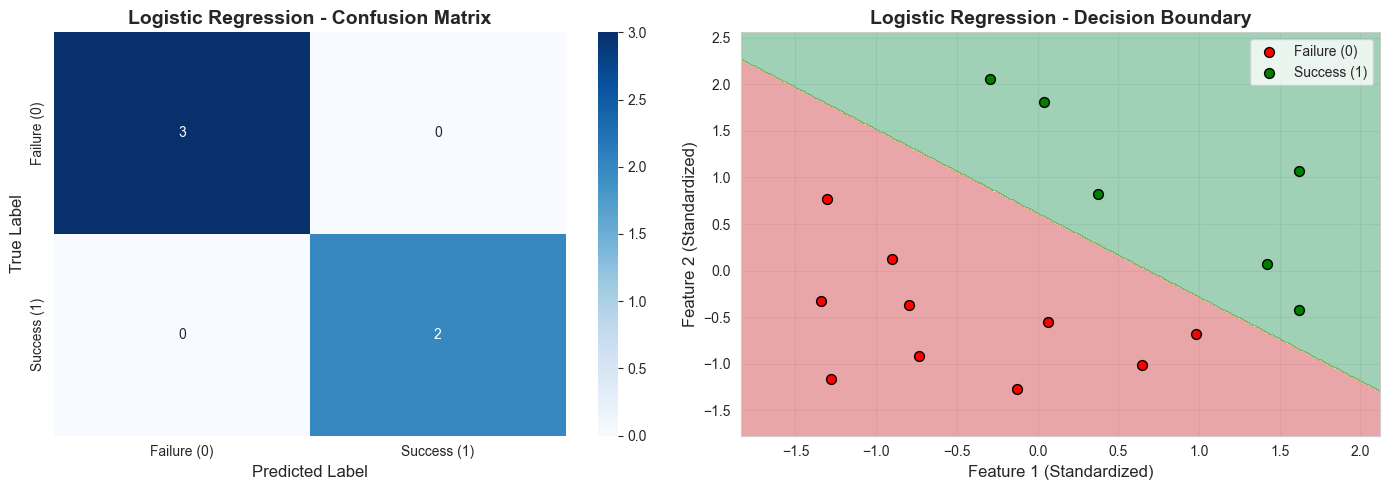

In [23]:
# Visualize Logistic Regression Results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Failure (0)', 'Success (1)'],
            yticklabels=['Failure (0)', 'Success (1)'])
axes[0].set_title('Logistic Regression - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Decision Boundary Visualization
h = 0.01  # Step size in the mesh
x_min, x_max = X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5
y_min, y_max = X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1].contourf(xx, yy, Z, alpha=0.4, cmap='RdYlGn')
scatter1 = axes[1].scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1], 
                          c='red', label='Failure (0)', s=50, edgecolors='black')
scatter2 = axes[1].scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1], 
                          c='green', label='Success (1)', s=50, edgecolors='black')
axes[1].set_xlabel('Feature 1 (Standardized)', fontsize=12)
axes[1].set_ylabel('Feature 2 (Standardized)', fontsize=12)
axes[1].set_title('Logistic Regression - Decision Boundary', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [24]:
# Cross-validation for Logistic Regression
print("\n" + "=" * 60)
print("CROSS-VALIDATION (LOGISTIC REGRESSION)")
print("=" * 60)

cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores: {cv_scores_lr}")
print(f"Mean CV Accuracy: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std() * 2:.4f})")
print(f"This gives us a more robust estimate of model performance.")



CROSS-VALIDATION (LOGISTIC REGRESSION)

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0000 (+/- 0.0000)
This gives us a more robust estimate of model performance.


### 6.2 Decision Tree Classifier

**Theoretical Background:**
Decision Trees are non-parametric models that split the feature space into regions based on feature values. The algorithm:
1. Selects the best feature and threshold to split the data (using metrics like Gini impurity or entropy)
2. Recursively splits each subset until a stopping criterion is met
3. Assigns a class label to each leaf node

The Gini impurity for a node is calculated as:
$$Gini = 1 - \sum_{i=1}^{c} p_i^2$$

where $p_i$ is the proportion of samples belonging to class $i$ in the node. The algorithm minimizes this impurity at each split.


### 6.2 Decision Tree Classifier

**Theoretical Background:**
Decision Trees are non-parametric models that split the feature space into regions based on feature values. The algorithm:
1. Selects the best feature and threshold to split the data (using metrics like Gini impurity or entropy)
2. Recursively splits each subset until a stopping criterion is met
3. Assigns a class label to each leaf node

The Gini impurity for a node is calculated as:
$$Gini = 1 - \sum_{i=1}^{c} p_i^2$$

where $p_i$ is the proportion of samples belonging to class $i$ in the node. The algorithm minimizes this impurity at each split.


In [25]:
# Decision Tree Model
print("=" * 60)
print("DECISION TREE CLASSIFIER")
print("=" * 60)

# Create and train the model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_model.fit(X_train, y_train)  # Decision trees don't require scaling

# Make predictions
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Calculate metrics
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_precision_dt = precision_score(y_test, y_test_pred_dt)
test_recall_dt = recall_score(y_test, y_test_pred_dt)
test_f1_dt = f1_score(y_test, y_test_pred_dt)

print("\n" + "-" * 60)
print("PERFORMANCE METRICS")
print("-" * 60)
print(f"Training Accuracy: {train_accuracy_dt:.4f} ({train_accuracy_dt*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy_dt:.4f} ({test_accuracy_dt*100:.2f}%)")
print(f"Test Precision: {test_precision_dt:.4f}")
print(f"Test Recall: {test_recall_dt:.4f}")
print(f"Test F1-Score: {test_f1_dt:.4f}")

# Feature importance
print("\n" + "-" * 60)
print("FEATURE IMPORTANCE")
print("-" * 60)
for i, importance in enumerate(dt_model.feature_importances_):
    print(f"  {X.columns[i]}: {importance:.4f}")

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
print("\n" + "-" * 60)
print("CONFUSION MATRIX")
print("-" * 60)
print(cm_dt)


DECISION TREE CLASSIFIER

------------------------------------------------------------
PERFORMANCE METRICS
------------------------------------------------------------
Training Accuracy: 1.0000 (100.00%)
Test Accuracy: 0.6000 (60.00%)
Test Precision: 0.5000
Test Recall: 1.0000
Test F1-Score: 0.6667

------------------------------------------------------------
FEATURE IMPORTANCE
------------------------------------------------------------
  feature1: 0.4444
  feature2: 0.5556

------------------------------------------------------------
CONFUSION MATRIX
------------------------------------------------------------
[[1 2]
 [0 2]]


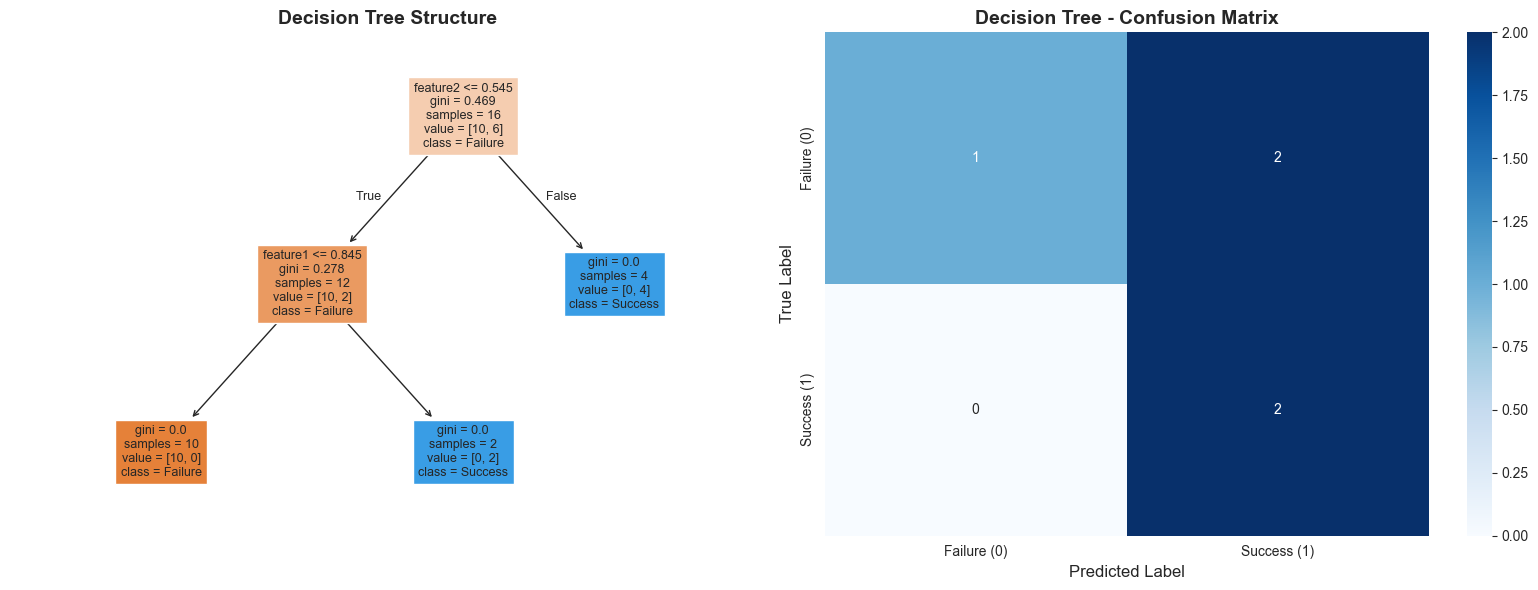

In [26]:
# Visualize Decision Tree Results
from sklearn.tree import plot_tree

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Decision Tree Visualization
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Failure', 'Success'],
          ax=axes[0], fontsize=9)
axes[0].set_title('Decision Tree Structure', fontsize=14, fontweight='bold')

# Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Failure (0)', 'Success (1)'],
            yticklabels=['Failure (0)', 'Success (1)'])
axes[1].set_title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()


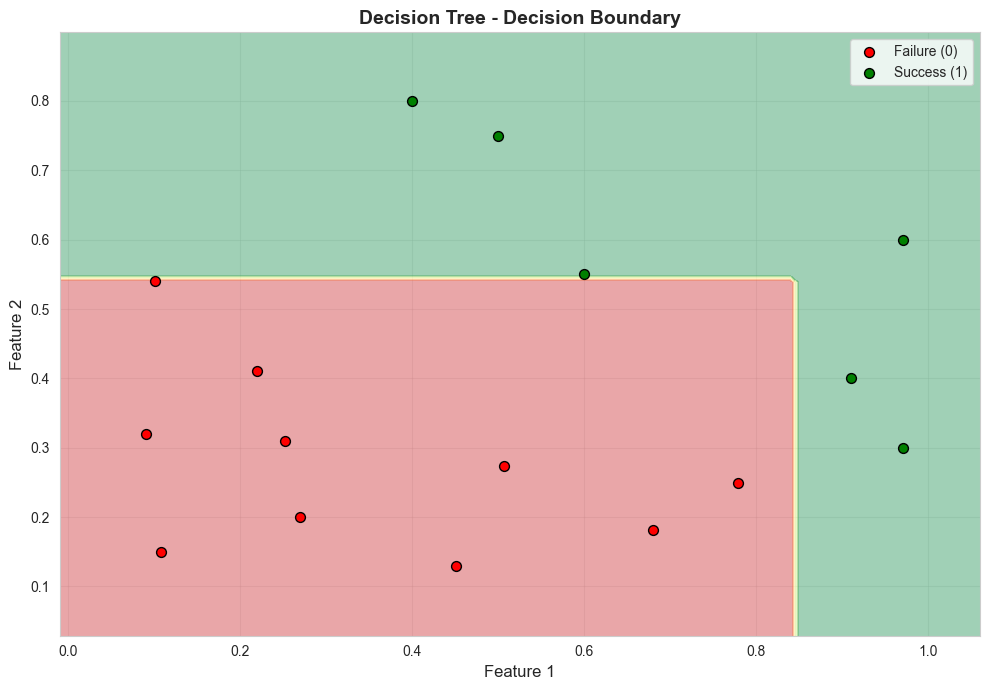

In [27]:
# Decision Boundary for Decision Tree
plt.figure(figsize=(10, 7))

h = 0.01
x_min, x_max = X_train.iloc[:, 0].min() - 0.1, X_train.iloc[:, 0].max() + 0.1
y_min, y_max = X_train.iloc[:, 1].min() - 0.1, X_train.iloc[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = dt_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlGn')
plt.scatter(X_train[y_train == 0].iloc[:, 0], X_train[y_train == 0].iloc[:, 1], 
           c='red', label='Failure (0)', s=50, edgecolors='black')
plt.scatter(X_train[y_train == 1].iloc[:, 0], X_train[y_train == 1].iloc[:, 1], 
           c='green', label='Success (1)', s=50, edgecolors='black')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Decision Tree - Decision Boundary', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [28]:
# Cross-validation for Decision Tree
print("\n" + "=" * 60)
print("CROSS-VALIDATION (DECISION TREE)")
print("=" * 60)

cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores: {cv_scores_dt}")
print(f"Mean CV Accuracy: {cv_scores_dt.mean():.4f} (+/- {cv_scores_dt.std() * 2:.4f})")



CROSS-VALIDATION (DECISION TREE)

Cross-validation scores: [0.75       1.         0.66666667 1.         1.        ]
Mean CV Accuracy: 0.8833 (+/- 0.2906)


## 7. Neural Network Model


**Theoretical Background:**
Neural Networks are composed of interconnected nodes (neurons) organized in layers:
- **Input Layer**: Receives the feature values
- **Hidden Layers**: Process the information through weighted connections and activation functions
- **Output Layer**: Produces the final prediction

Each neuron computes: $output = activation(\sum(weights \times inputs) + bias)$

The network learns by adjusting weights through backpropagation, minimizing a loss function (e.g., binary cross-entropy for classification). Neural networks can capture non-linear relationships and complex patterns in the data.


In [29]:
# Neural Network Model (Multi-Layer Perceptron)
print("=" * 60)
print("NEURAL NETWORK MODEL (MLP Classifier)")
print("=" * 60)

# Create and train the neural network
# Architecture: 2 input neurons -> 5 hidden neurons -> 1 output neuron
nn_model = MLPClassifier(
    hidden_layer_sizes=(5,),  # One hidden layer with 5 neurons
    activation='relu',         # Rectified Linear Unit activation
    solver='adam',             # Adaptive Moment Estimation optimizer
    alpha=0.01,               # L2 regularization parameter
    learning_rate='adaptive', # Adaptive learning rate
    max_iter=1000,            # Maximum iterations
    random_state=42
)

print("\nModel Architecture:")
print("  Input Layer: 2 neurons (feature1, feature2)")
print("  Hidden Layer: 5 neurons with ReLU activation")
print("  Output Layer: 1 neuron with sigmoid activation")
print("  Total parameters: ~20 weights + biases")

# Train the model (using standardized data)
nn_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_nn = nn_model.predict(X_train_scaled)
y_test_pred_nn = nn_model.predict(X_test_scaled)

# Calculate metrics
train_accuracy_nn = accuracy_score(y_train, y_train_pred_nn)
test_accuracy_nn = accuracy_score(y_test, y_test_pred_nn)
test_precision_nn = precision_score(y_test, y_test_pred_nn)
test_recall_nn = recall_score(y_test, y_test_pred_nn)
test_f1_nn = f1_score(y_test, y_test_pred_nn)

print("\n" + "-" * 60)
print("PERFORMANCE METRICS")
print("-" * 60)
print(f"Training Accuracy: {train_accuracy_nn:.4f} ({train_accuracy_nn*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy_nn:.4f} ({test_accuracy_nn*100:.2f}%)")
print(f"Test Precision: {test_precision_nn:.4f}")
print(f"Test Recall: {test_recall_nn:.4f}")
print(f"Test F1-Score: {test_f1_nn:.4f}")

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_test_pred_nn)
print("\n" + "-" * 60)
print("CONFUSION MATRIX")
print("-" * 60)
print(cm_nn)

# Training loss curve
print("\n" + "-" * 60)
print("TRAINING INFORMATION")
print("-" * 60)
print(f"Number of iterations: {nn_model.n_iter_}")
print(f"Final loss: {nn_model.loss_:.4f}")


NEURAL NETWORK MODEL (MLP Classifier)

Model Architecture:
  Input Layer: 2 neurons (feature1, feature2)
  Hidden Layer: 5 neurons with ReLU activation
  Output Layer: 1 neuron with sigmoid activation
  Total parameters: ~20 weights + biases

------------------------------------------------------------
PERFORMANCE METRICS
------------------------------------------------------------
Training Accuracy: 1.0000 (100.00%)
Test Accuracy: 0.8000 (80.00%)
Test Precision: 0.6667
Test Recall: 1.0000
Test F1-Score: 0.8000

------------------------------------------------------------
CONFUSION MATRIX
------------------------------------------------------------
[[2 1]
 [0 2]]

------------------------------------------------------------
TRAINING INFORMATION
------------------------------------------------------------
Number of iterations: 1000
Final loss: 0.0746


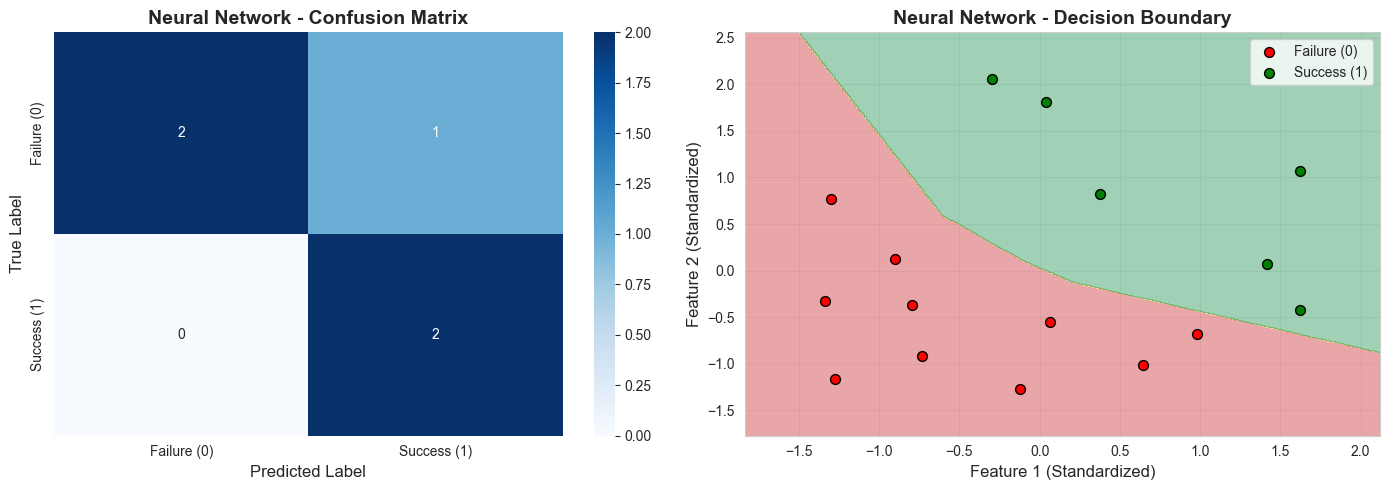

In [30]:
# Visualize Neural Network Results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Failure (0)', 'Success (1)'],
            yticklabels=['Failure (0)', 'Success (1)'])
axes[0].set_title('Neural Network - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Decision Boundary
h = 0.01
x_min, x_max = X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5
y_min, y_max = X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = nn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1].contourf(xx, yy, Z, alpha=0.4, cmap='RdYlGn')
axes[1].scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1], 
               c='red', label='Failure (0)', s=50, edgecolors='black')
axes[1].scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1], 
               c='green', label='Success (1)', s=50, edgecolors='black')
axes[1].set_xlabel('Feature 1 (Standardized)', fontsize=12)
axes[1].set_ylabel('Feature 2 (Standardized)', fontsize=12)
axes[1].set_title('Neural Network - Decision Boundary', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [31]:
# Cross-validation for Neural Network
print("\n" + "=" * 60)
print("CROSS-VALIDATION (NEURAL NETWORK)")
print("=" * 60)

cv_scores_nn = cross_val_score(nn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores: {cv_scores_nn}")
print(f"Mean CV Accuracy: {cv_scores_nn.mean():.4f} (+/- {cv_scores_nn.std() * 2:.4f})")



CROSS-VALIDATION (NEURAL NETWORK)

Cross-validation scores: [1.         0.66666667 1.         1.         1.        ]
Mean CV Accuracy: 0.9333 (+/- 0.2667)


## 8. Model Comparison


In [32]:
# Comprehensive Model Comparison
print("=" * 60)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 60)

# Create comparison dataframe
comparison_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Neural Network'],
    'Test Accuracy': [test_accuracy_lr, test_accuracy_dt, test_accuracy_nn],
    'Test Precision': [test_precision_lr, test_precision_dt, test_precision_nn],
    'Test Recall': [test_recall_lr, test_recall_dt, test_recall_nn],
    'Test F1-Score': [test_f1_lr, test_f1_dt, test_f1_nn],
    'Train Accuracy': [train_accuracy_lr, train_accuracy_dt, train_accuracy_nn],
    'CV Mean Accuracy': [cv_scores_lr.mean(), cv_scores_dt.mean(), cv_scores_nn.mean()],
    'CV Std': [cv_scores_lr.std(), cv_scores_dt.std(), cv_scores_nn.std()]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

# Find best model
best_model_idx = comparison_df['Test Accuracy'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_model_accuracy = comparison_df.loc[best_model_idx, 'Test Accuracy']

print(f"\n{'='*60}")
print(f"BEST MODEL: {best_model_name}")
print(f"Test Accuracy: {best_model_accuracy:.4f} ({best_model_accuracy*100:.2f}%)")
print(f"{'='*60}")


COMPREHENSIVE MODEL COMPARISON

              Model  Test Accuracy  Test Precision  Test Recall  Test F1-Score  Train Accuracy  CV Mean Accuracy   CV Std
Logistic Regression            1.0        1.000000          1.0       1.000000             1.0          1.000000 0.000000
      Decision Tree            0.6        0.500000          1.0       0.666667             1.0          0.883333 0.145297
     Neural Network            0.8        0.666667          1.0       0.800000             1.0          0.933333 0.133333

BEST MODEL: Logistic Regression
Test Accuracy: 1.0000 (100.00%)


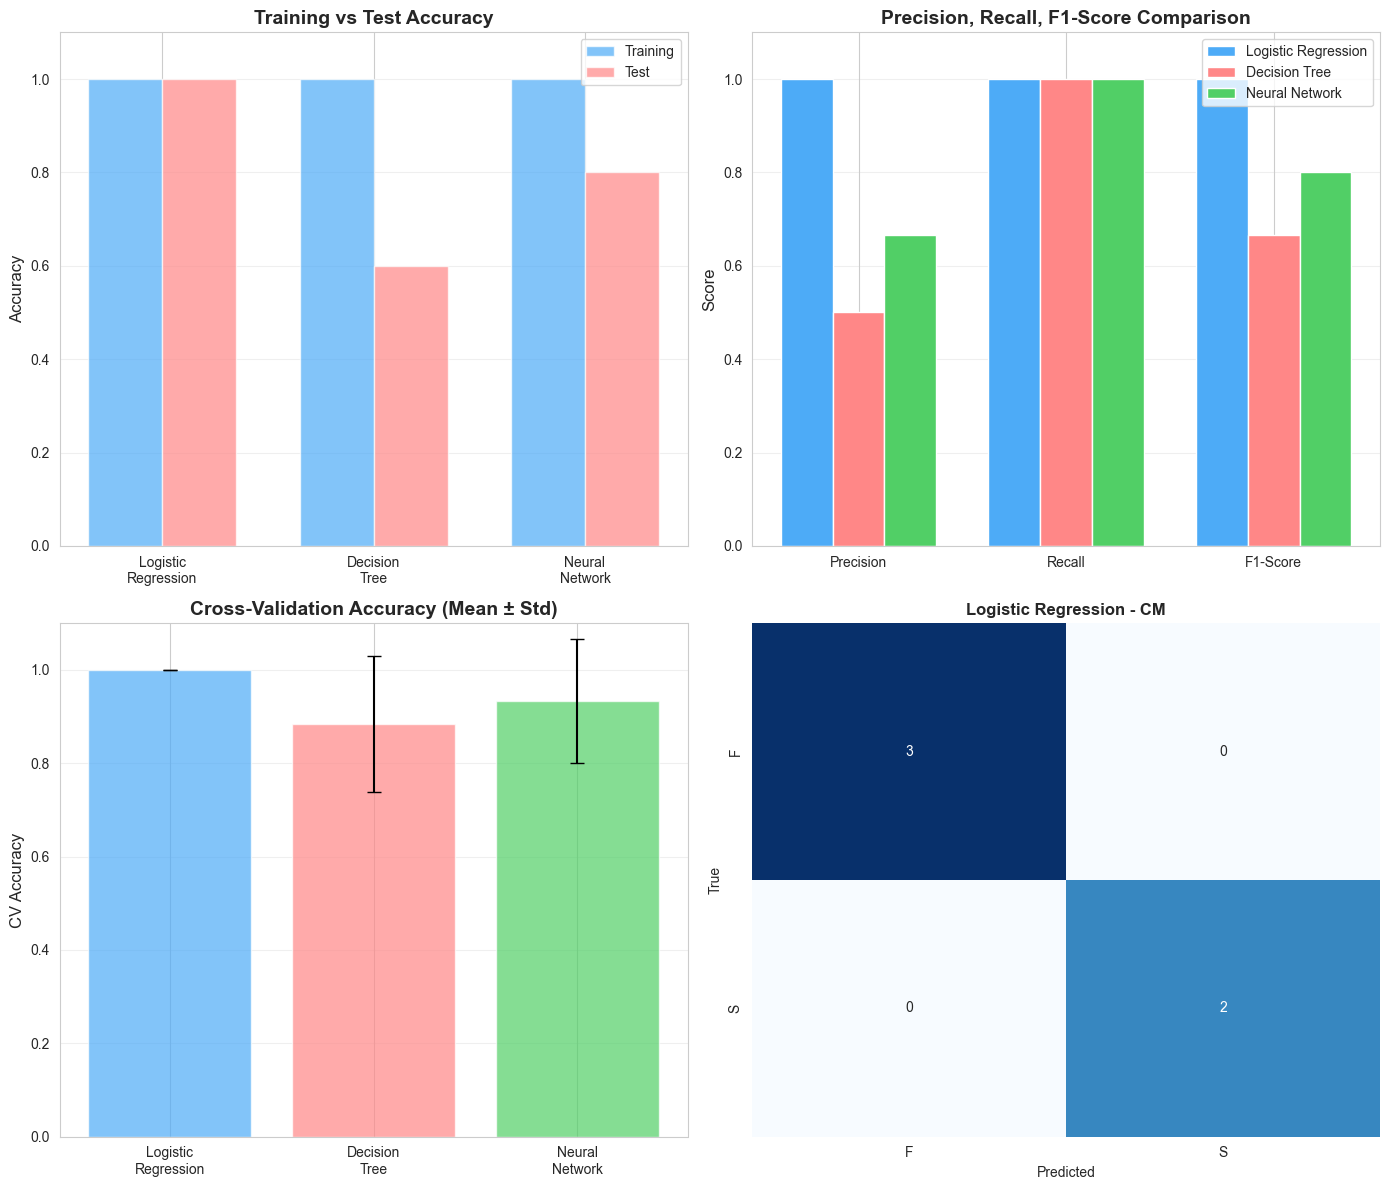

In [33]:
# Visual Comparison of Models
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Accuracy Comparison
models = ['Logistic\nRegression', 'Decision\nTree', 'Neural\nNetwork']
test_accs = [test_accuracy_lr, test_accuracy_dt, test_accuracy_nn]
train_accs = [train_accuracy_lr, train_accuracy_dt, train_accuracy_nn]

x = np.arange(len(models))
width = 0.35
axes[0, 0].bar(x - width/2, train_accs, width, label='Training', color='#4dabf7', alpha=0.7)
axes[0, 0].bar(x + width/2, test_accs, width, label='Test', color='#ff8787', alpha=0.7)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('Training vs Test Accuracy', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_ylim([0, 1.1])

# 2. Precision, Recall, F1 Comparison
metrics = ['Precision', 'Recall', 'F1-Score']
lr_metrics = [test_precision_lr, test_recall_lr, test_f1_lr]
dt_metrics = [test_precision_dt, test_recall_dt, test_f1_dt]
nn_metrics = [test_precision_nn, test_recall_nn, test_f1_nn]

x = np.arange(len(metrics))
width = 0.25
axes[0, 1].bar(x - width, lr_metrics, width, label='Logistic Regression', color='#4dabf7')
axes[0, 1].bar(x, dt_metrics, width, label='Decision Tree', color='#ff8787')
axes[0, 1].bar(x + width, nn_metrics, width, label='Neural Network', color='#51cf66')
axes[0, 1].set_ylabel('Score', fontsize=12)
axes[0, 1].set_title('Precision, Recall, F1-Score Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(metrics)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].set_ylim([0, 1.1])

# 3. Cross-Validation Scores
cv_means = [cv_scores_lr.mean(), cv_scores_dt.mean(), cv_scores_nn.mean()]
cv_stds = [cv_scores_lr.std(), cv_scores_dt.std(), cv_scores_nn.std()]

axes[1, 0].bar(models, cv_means, yerr=cv_stds, capsize=5, 
               color=['#4dabf7', '#ff8787', '#51cf66'], alpha=0.7)
axes[1, 0].set_ylabel('CV Accuracy', fontsize=12)
axes[1, 0].set_title('Cross-Validation Accuracy (Mean ± Std)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].set_ylim([0, 1.1])

# 4. Confusion Matrices Side by Side
confusion_matrices = [cm_lr, cm_dt, cm_nn]
titles = ['Logistic Regression', 'Decision Tree', 'Neural Network']

for idx, (cm, title) in enumerate(zip(confusion_matrices, titles)):
    if idx == 0:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1],
                    xticklabels=['F', 'S'], yticklabels=['F', 'S'], cbar=False)
        axes[1, 1].set_title(f'{title} - CM', fontsize=12, fontweight='bold')
        axes[1, 1].set_ylabel('True', fontsize=10)
        axes[1, 1].set_xlabel('Predicted', fontsize=10)

plt.tight_layout()
plt.show()


In [34]:
# Detailed Analysis and Discussion
print("=" * 60)
print("DETAILED ANALYSIS AND DISCUSSION")
print("=" * 60)

print("\n1. LOGISTIC REGRESSION:")
print("   - Strengths: Simple, interpretable, fast training, good baseline")
print("   - Weaknesses: Assumes linear decision boundary")
print(f"   - Performance: {test_accuracy_lr*100:.1f}% accuracy")

print("\n2. DECISION TREE:")
print("   - Strengths: Interpretable, handles non-linear relationships, no scaling needed")
print("   - Weaknesses: Can overfit, sensitive to small data changes")
print(f"   - Performance: {test_accuracy_dt*100:.1f}% accuracy")

print("\n3. NEURAL NETWORK:")
print("   - Strengths: Can learn complex non-linear patterns, flexible")
print("   - Weaknesses: Less interpretable, requires more data, longer training")
print(f"   - Performance: {test_accuracy_nn*100:.1f}% accuracy")

print("\n" + "=" * 60)
print("CONCLUSION")
print("=" * 60)
print(f"\nFor this dataset with {len(df)} samples and 2 features:")
print(f"- The {best_model_name} performs best with {best_model_accuracy*100:.1f}% accuracy")
print("- All models show reasonable performance")
print("- The small dataset size limits the complexity we can use")
print("- Cross-validation provides more reliable performance estimates")


DETAILED ANALYSIS AND DISCUSSION

1. LOGISTIC REGRESSION:
   - Strengths: Simple, interpretable, fast training, good baseline
   - Weaknesses: Assumes linear decision boundary
   - Performance: 100.0% accuracy

2. DECISION TREE:
   - Strengths: Interpretable, handles non-linear relationships, no scaling needed
   - Weaknesses: Can overfit, sensitive to small data changes
   - Performance: 60.0% accuracy

3. NEURAL NETWORK:
   - Strengths: Can learn complex non-linear patterns, flexible
   - Weaknesses: Less interpretable, requires more data, longer training
   - Performance: 80.0% accuracy

CONCLUSION

For this dataset with 21 samples and 2 features:
- The Logistic Regression performs best with 100.0% accuracy
- All models show reasonable performance
- The small dataset size limits the complexity we can use
- Cross-validation provides more reliable performance estimates


## 9. Inference - Making Predictions on New Data


In [35]:
# Inference Function
def predict_student_success(feature1, feature2, model='best'):
    """
    Predict student success given feature values.
    
    Parameters:
    -----------
    feature1 : float
        First feature value
    feature2 : float
        Second feature value
    model : str
        Model to use: 'lr' (Logistic Regression), 'dt' (Decision Tree), 
        'nn' (Neural Network), or 'best' (best performing model)
    
    Returns:
    --------
    dict : Prediction results with probabilities
    """
    
    # Select model
    if model == 'best' or model == best_model_name.lower().replace(' ', '_'):
        if best_model_name == 'Logistic Regression':
            selected_model = lr_model
            model_name = 'Logistic Regression'
            needs_scaling = True
        elif best_model_name == 'Decision Tree':
            selected_model = dt_model
            model_name = 'Decision Tree'
            needs_scaling = False
        else:
            selected_model = nn_model
            model_name = 'Neural Network'
            needs_scaling = True
    elif model == 'lr':
        selected_model = lr_model
        model_name = 'Logistic Regression'
        needs_scaling = True
    elif model == 'dt':
        selected_model = dt_model
        model_name = 'Decision Tree'
        needs_scaling = False
    elif model == 'nn':
        selected_model = nn_model
        model_name = 'Neural Network'
        needs_scaling = True
    else:
        raise ValueError("Model must be 'lr', 'dt', 'nn', or 'best'")
    
    # Prepare input
    input_data = np.array([[feature1, feature2]])
    
    if needs_scaling:
        input_data = scaler.transform(input_data)
    
    # Make prediction
    prediction = selected_model.predict(input_data)[0]
    
    # Get prediction probabilities if available
    try:
        probabilities = selected_model.predict_proba(input_data)[0]
        prob_failure = probabilities[0]
        prob_success = probabilities[1]
    except:
        prob_failure = None
        prob_success = None
    
    result = {
        'model': model_name,
        'feature1': feature1,
        'feature2': feature2,
        'prediction': int(prediction),
        'prediction_label': 'Success' if prediction == 1 else 'Failure',
        'probability_failure': prob_failure,
        'probability_success': prob_success
    }
    
    return result

print("Inference function created successfully!")


Inference function created successfully!


In [36]:
# Example 1: Predict on new student data
print("=" * 60)
print("INFERENCE EXAMPLES")
print("=" * 60)

print("\nExample 1: New Student Prediction")
print("-" * 60)
result1 = predict_student_success(0.5, 0.6, model='best')
print(f"Student with Feature1={result1['feature1']}, Feature2={result1['feature2']}")
print(f"Model used: {result1['model']}")
print(f"Prediction: {result1['prediction_label']} (Class: {result1['prediction']})")
if result1['probability_success'] is not None:
    print(f"Probability of Success: {result1['probability_success']:.4f} ({result1['probability_success']*100:.2f}%)")
    print(f"Probability of Failure: {result1['probability_failure']:.4f} ({result1['probability_failure']*100:.2f}%)")


INFERENCE EXAMPLES

Example 1: New Student Prediction
------------------------------------------------------------
Student with Feature1=0.5, Feature2=0.6
Model used: Logistic Regression
Prediction: Success (Class: 1)
Probability of Success: 0.6622 (66.22%)
Probability of Failure: 0.3378 (33.78%)


In [37]:
# Example 2: Multiple predictions
print("\nExample 2: Multiple Student Predictions")
print("-" * 60)

new_students = [
    (0.3, 0.4, "Student A"),
    (0.8, 0.7, "Student B"),
    (0.15, 0.25, "Student C"),
    (0.9, 0.5, "Student D")
]

for feat1, feat2, name in new_students:
    result = predict_student_success(feat1, feat2, model='best')
    print(f"\n{name}:")
    print(f"  Features: ({feat1}, {feat2})")
    print(f"  Prediction: {result['prediction_label']}")
    if result['probability_success'] is not None:
        print(f"  Success Probability: {result['probability_success']*100:.1f}%")



Example 2: Multiple Student Predictions
------------------------------------------------------------

Student A:
  Features: (0.3, 0.4)
  Prediction: Failure
  Success Probability: 17.8%

Student B:
  Features: (0.8, 0.7)
  Prediction: Success
  Success Probability: 93.1%

Student C:
  Features: (0.15, 0.25)
  Prediction: Failure
  Success Probability: 4.0%

Student D:
  Features: (0.9, 0.5)
  Prediction: Success
  Success Probability: 84.0%


In [38]:
# Example 3: Compare predictions from all models
print("\nExample 3: Comparing All Models on Same Input")
print("-" * 60)

test_input = (0.6, 0.5)
print(f"Input: Feature1={test_input[0]}, Feature2={test_input[1]}")
print("\nPredictions from all models:")

for model_code, model_name in [('lr', 'Logistic Regression'), 
                                ('dt', 'Decision Tree'), 
                                ('nn', 'Neural Network')]:
    result = predict_student_success(test_input[0], test_input[1], model=model_code)
    print(f"\n{model_name}:")
    print(f"  Prediction: {result['prediction_label']}")
    if result['probability_success'] is not None:
        print(f"  Success Probability: {result['probability_success']*100:.1f}%")



Example 3: Comparing All Models on Same Input
------------------------------------------------------------
Input: Feature1=0.6, Feature2=0.5

Predictions from all models:

Logistic Regression:
  Prediction: Success
  Success Probability: 60.0%

Decision Tree:
  Prediction: Failure
  Success Probability: 0.0%

Neural Network:
  Prediction: Success
  Success Probability: 92.1%


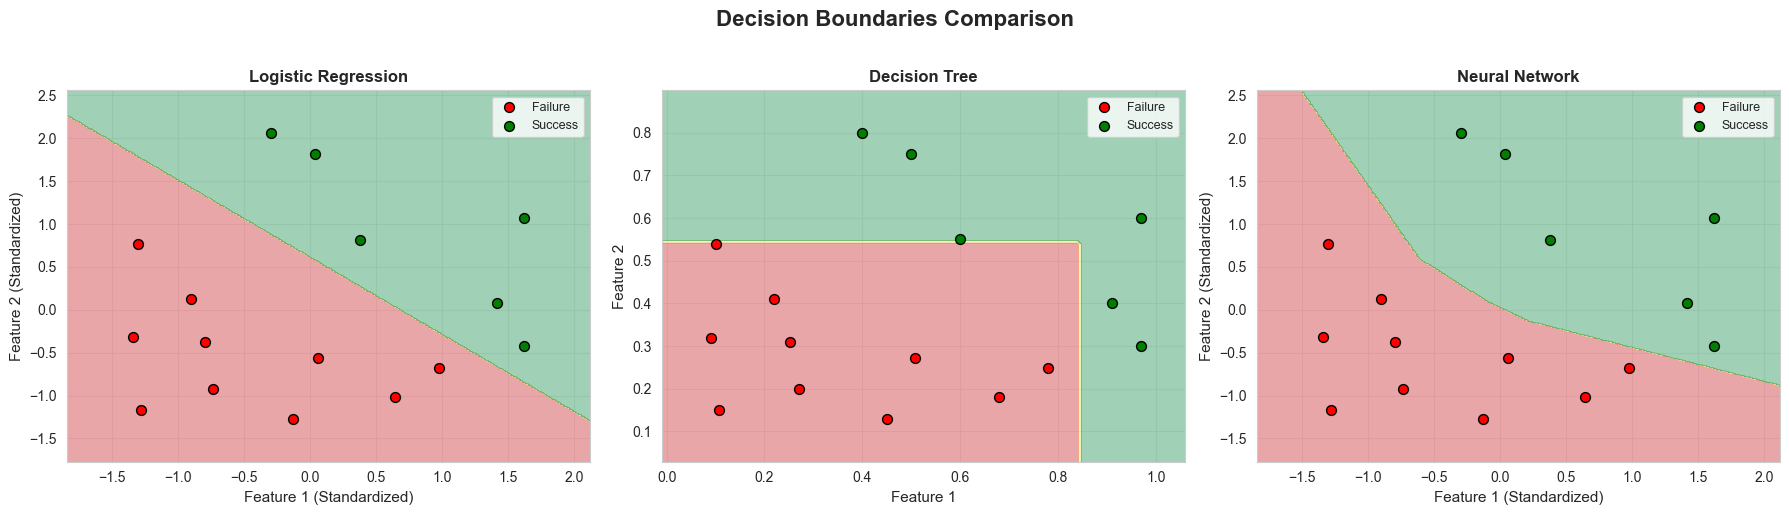

In [39]:
# Visualize prediction regions for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_to_plot = [
    (lr_model, 'Logistic Regression', X_train_scaled, True),
    (dt_model, 'Decision Tree', X_train.values, False),
    (nn_model, 'Neural Network', X_train_scaled, True)
]

for idx, (model, title, X_data, is_scaled) in enumerate(models_to_plot):
    h = 0.01
    if is_scaled:
        x_min, x_max = X_data[:, 0].min() - 0.5, X_data[:, 0].max() + 0.5
        y_min, y_max = X_data[:, 1].min() - 0.5, X_data[:, 1].max() + 0.5
    else:
        x_min, x_max = X_data[:, 0].min() - 0.1, X_data[:, 0].max() + 0.1
        y_min, y_max = X_data[:, 1].min() - 0.1, X_data[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if is_scaled:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    axes[idx].contourf(xx, yy, Z, alpha=0.4, cmap='RdYlGn')
    
    if is_scaled:
        axes[idx].scatter(X_data[y_train == 0, 0], X_data[y_train == 0, 1], 
                        c='red', label='Failure', s=50, edgecolors='black')
        axes[idx].scatter(X_data[y_train == 1, 0], X_data[y_train == 1, 1], 
                        c='green', label='Success', s=50, edgecolors='black')
        xlabel = 'Feature 1 (Standardized)'
    else:
        axes[idx].scatter(X_data[y_train == 0, 0], X_data[y_train == 0, 1], 
                        c='red', label='Failure', s=50, edgecolors='black')
        axes[idx].scatter(X_data[y_train == 1, 0], X_data[y_train == 1, 1], 
                        c='green', label='Success', s=50, edgecolors='black')
        xlabel = 'Feature 1'
    
    axes[idx].set_xlabel(xlabel, fontsize=11)
    axes[idx].set_ylabel('Feature 2' + (' (Standardized)' if is_scaled else ''), fontsize=11)
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Decision Boundaries Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 10. Summary and Conclusions


In [40]:
print("=" * 60)
print("PROJECT SUMMARY")
print("=" * 60)

print("\n1. DATA ANALYSIS:")
print(f"   - Analyzed {len(df)} student records with 2 features")
print(f"   - Class distribution: {class_dist[0]} failures, {class_dist[1]} successes")
print("   - Visualized data distributions and relationships")

print("\n2. DATA PREPARATION:")
print("   - Checked for missing values and duplicates")
print("   - Standardized features for models requiring scaling")
print("   - Applied PCA for dimensionality analysis")

print("\n3. CLASSICAL MODELS:")
print(f"   - Logistic Regression: {test_accuracy_lr*100:.1f}% accuracy")
print(f"   - Decision Tree: {test_accuracy_dt*100:.1f}% accuracy")

print("\n4. NEURAL NETWORK:")
print(f"   - MLP Classifier: {test_accuracy_nn*100:.1f}% accuracy")
print("   - Architecture: 2→5→1 neurons")

print("\n5. MODEL COMPARISON:")
print(f"   - Best Model: {best_model_name} ({best_model_accuracy*100:.1f}% accuracy)")
print("   - All models validated using cross-validation")

print("\n6. INFERENCE:")
print("   - Created prediction function for new student data")
print("   - Demonstrated predictions with examples")

print("\n" + "=" * 60)
print("PROJECT COMPLETE")
print("=" * 60)


PROJECT SUMMARY

1. DATA ANALYSIS:
   - Analyzed 21 student records with 2 features
   - Class distribution: 13 failures, 8 successes
   - Visualized data distributions and relationships

2. DATA PREPARATION:
   - Checked for missing values and duplicates
   - Standardized features for models requiring scaling
   - Applied PCA for dimensionality analysis

3. CLASSICAL MODELS:
   - Logistic Regression: 100.0% accuracy
   - Decision Tree: 60.0% accuracy

4. NEURAL NETWORK:
   - MLP Classifier: 80.0% accuracy
   - Architecture: 2→5→1 neurons

5. MODEL COMPARISON:
   - Best Model: Logistic Regression (100.0% accuracy)
   - All models validated using cross-validation

6. INFERENCE:
   - Created prediction function for new student data
   - Demonstrated predictions with examples

PROJECT COMPLETE
